In [15]:
import gym
import gym_maze
import time
import random
import numpy
import matplotlib.pyplot as plt

In [16]:
def select_action(Q, s, epsilon = 1):
    if(random.random() < epsilon):
        return random.randint(0, 3)
    else:
        action = 0
        for i in range(4):
            if Q[s][i] > Q[s][action]:
                action = i

        return action

In [17]:
def map_action(action):
    if action == 0:
        return 'U'
    if action == 1:
        return 'S'
    if action == 2:
        return 'E'
    if action == 3:
        return 'W'

In [18]:
def map_state(state, n):
    return state[1] * n + state[0] 

In [19]:
# Create an environment
env = gym.make("maze-random-10x10-plus-v0")
observation = env.reset()

# Define the maximum number of iterations
NUM_EPISODES = 1000000
n = 10
learning_rate = 0.01
gamma = 0.99
epsilon = 1
Q = {}

for i in range(100):
    Q[i] = [0 for j in range(4)]

state = observation
success = 0
for episode in range(NUM_EPISODES):

    mapped_state = map_state(state, n)
    action = select_action(Q, mapped_state, epsilon)
    epsilon -= (1 / NUM_EPISODES)
             
    next_state, reward, done, truncated = env.step(action)
    mapped_next_state = map_state(next_state, n)
    Q[mapped_state][action] += learning_rate * (reward + gamma * max(Q[mapped_next_state]) - Q[mapped_state][action])
    cnt += 1

    state = next_state
    
    if(mapped_next_state == 99):
        success += 1

    if done or truncated:
        observation = env.reset()
        state = observation
        
env.render()
# Close the environment
env.close()

In [22]:
print(NUM_EPISODES / success)

90.86778736937755


In [ ]:
pi = {}
V = {}

for state in range(100):
    mx = 0
    for i in range(4):
        if(Q[state][i] > Q[state][mx]):
            mx = i
            
    pi[state] = mx
    V[state] = Q[state][mx]

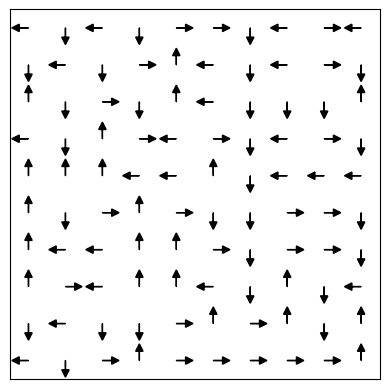

In [9]:
draw_grid(pi)

In [8]:
def draw_grid(directions, no_arrow_positions = []):
    rows = 10
    columns = 10
    cell_size = 1

    fig, ax = plt.subplots()

    for row in range(rows):
        for col in range(columns):
            index = row * columns + col
            direction = directions.get(index, None)

            if direction is not None and index not in no_arrow_positions:
                x = col * cell_size + cell_size / 2
                y = (rows - 1 - row) * cell_size + cell_size / 2

                if direction == 0:  # Upward arrow
                    ax.arrow(x, y, 0, cell_size / 4, head_width=0.2, head_length=0.2, fc='black', ec='black')
                elif direction == 2:  # Right arrow
                    ax.arrow(x, y, cell_size / 4, 0, head_width=0.2, head_length=0.2, fc='black', ec='black')
                elif direction == 1:  # Downward arrow
                    ax.arrow(x, y, 0, -cell_size / 4, head_width=0.2, head_length=0.2, fc='black', ec='black')
                elif direction == 3:  # Left arrow
                    ax.arrow(x, y, -cell_size / 4, 0, head_width=0.2, head_length=0.2, fc='black', ec='black')
            elif index in no_arrow_positions:
                c = 'black'
                if index == 47:
                    c = 'green'
                    
                ax.add_patch(plt.Rectangle((col, rows - 1 - row), 1, 1, color=c))

    ax.set_aspect('equal')
    ax.set_xlim(0, columns)
    ax.set_ylim(0, rows)
    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()

In [23]:
def draw_values(data, cell_width=1, cell_height=1):
    # Prepare data for plotting
    values = [data.get(i, 0) for i in range(100)]

    grid_values = [values[i:i+10] for i in range(0, len(values), 10)]

    # Calculate the total size of the figure
    fig_width = 10 * cell_width
    fig_height = 10 * cell_height

    # Create the plot with specified figure size
    plt.figure(figsize=(fig_width, fig_height))
    plt.imshow(grid_values, cmap='viridis', interpolation='nearest')

    # Add text annotations with values formatted to 3 decimal places
    for i in range(10):
        for j in range(10):
            plt.text(j, i, '{:.3f}'.format(grid_values[i][j]), ha='center', va='center', color='black')

    # Customize plot aesthetics
    plt.title('Grid Visualization')
    plt.colorbar(label='Values')
    plt.xticks(range(10), range(10))
    plt.yticks(range(10), range(10))
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.grid(visible=False)
    plt.show()

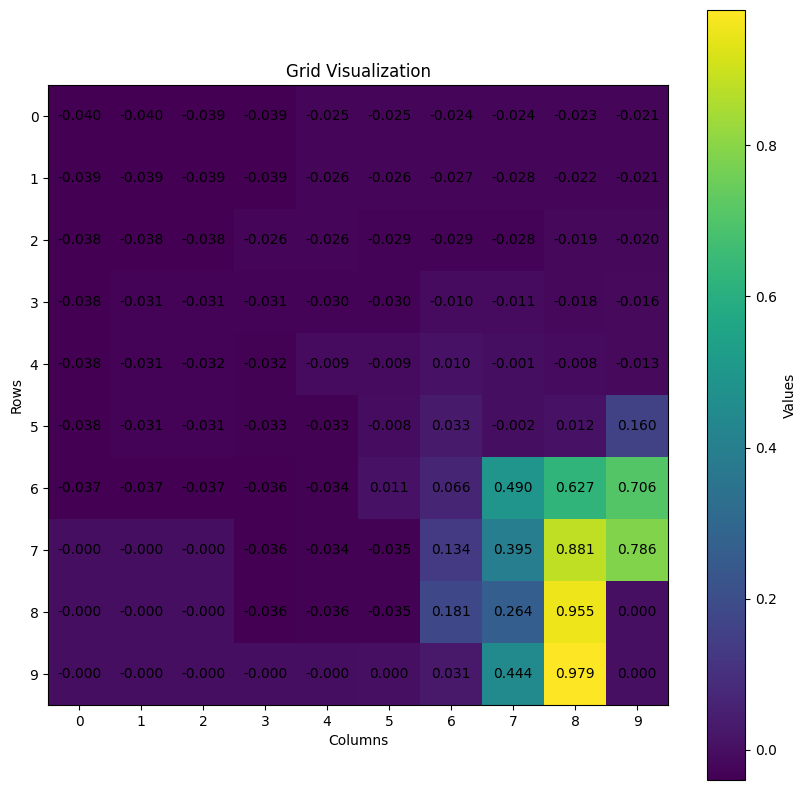

In [24]:
draw_values(V)

In [27]:
Q

{0: [0.009089821918434828,
  0.007218500206589351,
  0.010394869002907833,
  0.007626017530416557],
 1: [0.011743805369853857,
  0.014863480153388958,
  0.01370472555532047,
  0.011369310009807138],
 2: [0.013577029113041268,
  0.013535765120456086,
  0.015520473446853141,
  0.012532541325183185],
 3: [0.01736773143625815,
  0.01740595529239805,
  0.0200543503654279,
  0.014363450848275693],
 4: [0.021343131298287837,
  0.02582876161834347,
  0.02422418642345349,
  0.020481351798690813],
 5: [0.0236657463707663,
  0.024023645648095074,
  0.026871893928824744,
  0.022348445433187182],
 6: [0.029191384623971115,
  0.030153484304317253,
  0.03370522943651243,
  0.02536151286292841],
 7: [0.038366161200517425,
  0.038057903369400764,
  0.042904134237690114,
  0.03256682913337383],
 8: [0.03303418074712351,
  0.03315825469757111,
  0.03360295078264845,
  0.034993229207217105],
 9: [0.03805501872937356,
  0.03451236339223207,
  0.034390921413701064,
  0.04136318912881368],
 10: [0.0070414481